<a href="https://colab.research.google.com/github/Reddysekhar8333/30-days_ML_learning/blob/main/day_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Day 2 of ML learning

##1. Types of Machine Learning (Recap + Expansion)

1.Supervised Learning:

* The model learns from labeled data (input-output pairs).
    * Examples: Classification (spam detection), Regression (house price prediction).

* classification(spam detection)

    * Import Required Libraries
        * pandas → For data handling
        * train_test_split → Splits your data into training and testing parts
        * CountVectorizer → Converts text into numerical format (bag-of-words)
        * MultinomialNB → A Naive Bayes classifier suitable for text
        * accuracy_score, classification_report → Evaluate how good your model is

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
#Create a Sample Dataset
data = {
    'text': [
        'Win money now!!!',
        'Call this number to claim your prize',
        'Hey, how are you doing?',
        'Let’s catch up soon',
        'Free entry in a contest!',
        'Are we meeting today?',
        'You won a lottery!'
    ],
    'label': ['spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam']#ham = (not spam)
}
df = pd.DataFrame(data)

#Converts labels to 0 (ham) and 1 (spam) for the ML model to understand
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split into Training & Testing
#70% of the data is used to train, 30% to test the model
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)

#Convert Text to Numbers (Bag of Words)
vectorizer = CountVectorizer()#CountVectorizer() turns messages into word count vectors
X_train_vec = vectorizer.fit_transform(X_train)#fit_transform() learns the vocabulary and transforms the training data
X_test_vec = vectorizer.transform(X_test)#transform() uses the same vocab to convert test data

#Train the Naive Bayes Classifier
#Trains the model using word counts and their spam/ham labels
model = MultinomialNB()
model.fit(X_train_vec, y_train)

#Make Predictions & Evaluate
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* Regression (house price prediction)

    * Import Required Libraries
        * pandas: to handle data in table format
        * train_test_split: to split data into training & testing parts
        * LinearRegression: ML model to predict prices
        * mean_squared_error, r2_score: to check how good the model is

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create the Dataset
data = {
    'area': [1000, 1500, 1800, 2400, 3000],
    'bedrooms': [2, 3, 4, 4, 5],
    'age': [10, 15, 20, 8, 5],
    'price': [200000, 250000, 300000, 400000, 500000]
}
df = pd.DataFrame(data)

#Separate Features (X) and Target (y)
X = df[['area', 'bedrooms', 'age']]  # X: the input data the model will learn from
y = df['price']                      # y: the output we want to predict (house price)

#Split into Train and Test
#80% data used to train (X_train, y_train) & 20% data used to test (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the Linear Regression Model
#Model learns the relationship between area, bedrooms, age → price
model = LinearRegression()
model.fit(X_train, y_train)

#Make Predictions on Test Data
y_pred = model.predict(X_test)

# Evaluate the Model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
#Mean Squared Error (MSE): Lower is better
print("R2 Score:", r2_score(y_test, y_pred))
#R² Score: Value between 0 and 1. Closer to 1 = better fit.

# Predict new house price
new_house = [[2000, 3, 10]]  # area=2000, 3 bedrooms, 10 years old
predicted_price = model.predict(new_house)
print("Predicted Price for new house:", predicted_price[0])

Mean Squared Error: 69444444.44443975
R2 Score: nan
Predicted Price for new house: 320833.33333333326


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2.Unsupervised Learning:

* The model finds patterns in unlabeled data.
    * Examples: Clustering (customer segmentation), Dimensionality Reduction (PCA).

* 🧠 Clustering: (Customer Segmentation) using K-Means

    * We'll use two features: Annual Income and Spending Score to group customers.

    * Import Required Libraries
        * pandas: to handle data
        * matplotlib: to plot visualizations
        * KMeans: the algorithm for clustering
        * StandardScaler: to scale data for better clustering



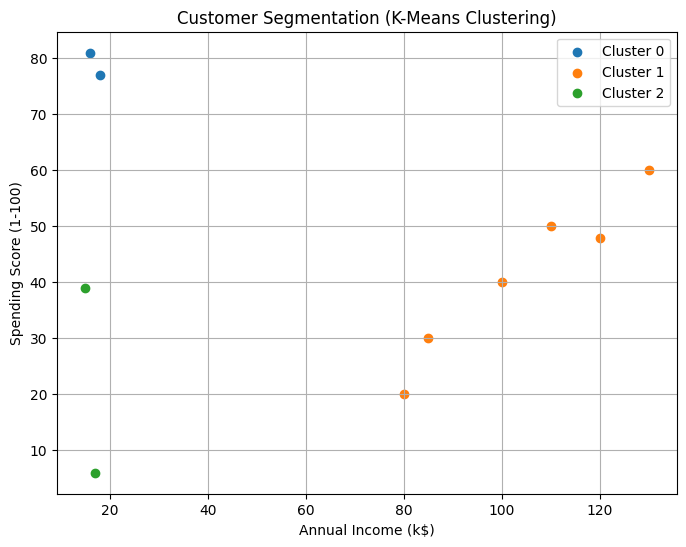

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Create a Sample Dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Annual Income (k$)': [15, 16, 17, 18, 100, 110, 120, 130, 80, 85],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 50, 48, 60, 20, 30]
}
df = pd.DataFrame(data)

#Select Features
#We only need these 2 features for clustering.
#These are the basis for finding patterns in customer behavior.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)#Scaling ensures fair comparison (mean = 0, std = 1)

#Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)#fit_predict() assigns a cluster number (0, 1, or 2) to each customer

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation (K-Means Clustering)')
plt.legend()
plt.grid(True)
plt.show()

* Dimensionality Reduction using PCA (Principal Component Analysis) using Python and scikit-learn.
* 🧠 Goal:
    * Reduce high-dimensional data to 2 principal components for easier visualization and faster computation.
    * Import Required Libraries
        * pandas, numpy: data handling
        * matplotlib: to plot the reduced data
        * load_iris: loads a famous flower dataset
        * PCA: the dimensionality reduction tool
        * StandardScaler: scales data for better PCA results


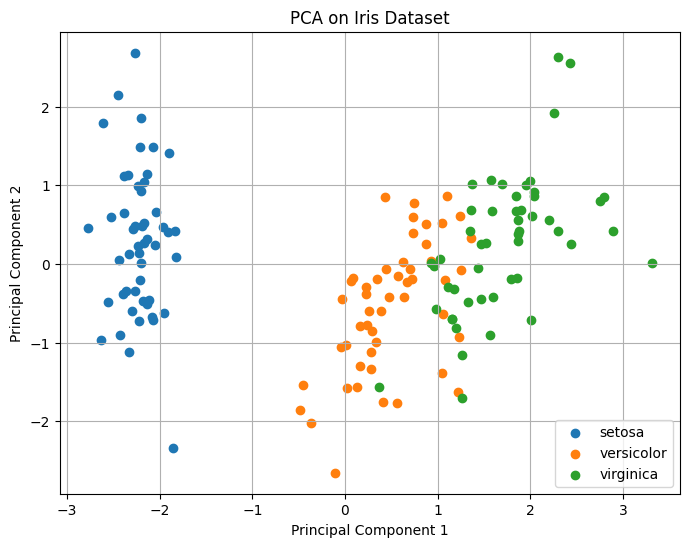

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels (0, 1, 2)

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#PCA is sensitive to scale.
#Standardization sets mean=0 and std=1, which improves PCA performance.

# Step 2: Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)#X_pca now contains just 2 values per sample (PC1 & PC2)

# Step 3: Plot the PCA results
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=iris.target_names[target])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


3.Reinforcement Learning:

* The model learns by trial and error using rewards/penalties (e.g., game-playing AI).

#2. Key Terminology
* Features (X): Input variables (e.g., age, salary for loan prediction).
* Target (y): Output variable (e.g., "loan approved: yes/no").
* Training Data: Data used to train the model.
* Test Data: Data used to evaluate the model’s performance.
* Overfitting: Model memorizes training data but fails on new data (complex model).
* Underfitting: Model is too simple to capture patterns (high bias).

#3. Data Preprocessing (Critical Step!)
* Handling Missing Values:
    * Drop rows/columns or impute (fill) with mean/median.
* Categorical Data Encoding:
    * One-Hot Encoding: Convert categories to binary columns (e.g., "Red" = [1, 0, 0]).
    * Label Encoding: Assign numbers to categories (e.g., "Dog" = 0, "Cat" = 1).
* Feature Scaling:
    * Standardization: Transform data to have mean=0, std=1.
    * Normalization: Scale data to [0, 1] range.

1. Handling Missing Values

In [ ]:
#Dropping Missing Values
import pandas as pd
# Create a sample DataFrame with missing values
data = {'Age': [25, 30, None, 35, 40], 'Salary': [50000, None, 60000, None, 70000]}
df = pd.DataFrame(data)
# Drop rows with any missing values
df_dropped = df.dropna()
print("After dropping missing values:\n", df_dropped)


#Imputing Missing Values
from sklearn.impute import SimpleImputer
# Impute with mean (for numerical data)
imputer = SimpleImputer(strategy='mean')  # Also: 'median', 'most_frequent'
df[['Age', 'Salary']] = imputer.fit_transform(df[['Age', 'Salary']])
print("After imputation:\n", df)

After dropping missing values:
     Age   Salary
0  25.0  50000.0
4  40.0  70000.0
After imputation:
     Age   Salary
0  25.0  50000.0
1  30.0  60000.0
2  32.5  60000.0
3  35.0  60000.0
4  40.0  70000.0


2.Encoding Categorical Data

In [ ]:
#Label Encoding (for ordinal categories)
from sklearn.preprocessing import LabelEncoder
# Sample data
data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)
# Convert categories to integers (0, 1, 2, ...)
encoder = LabelEncoder()
df['Color_encoded'] = encoder.fit_transform(df['Color'])
print("Label Encoded:\n", df)

#One-Hot Encoding (for nominal categories)
from sklearn.preprocessing import OneHotEncoder
# Create one-hot encoded columns
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['Color']])
# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Color']))
print("One-Hot Encoded:\n", encoded_df)



Label Encoded:
    Color  Color_encoded
0    Red              2
1   Blue              0
2  Green              1
3   Blue              0
4    Red              2
One-Hot Encoded:
    Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0
4         0.0          0.0        1.0


3. Feature Scaling

In [ ]:
#Standardization (Mean=0, Std=1)
from sklearn.preprocessing import StandardScaler
# Sample data
data = {'Age': [25, 30, 35, 40], 'Salary': [50000, 60000, 70000, 80000]}
df = pd.DataFrame(data)
# Standardize features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Standardized Data:\n", df_scaled)


#Normalization (Scale to [0, 1])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Normalized Data:\n", df_normalized)

Standardized Data:
         Age    Salary
0 -1.341641 -1.341641
1 -0.447214 -0.447214
2  0.447214  0.447214
3  1.341641  1.341641
Normalized Data:
         Age    Salary
0  0.000000  0.000000
1  0.333333  0.333333
2  0.666667  0.666667
3  1.000000  1.000000


4. Splitting Data into Train/Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
# Sample DataFrame (from earlier preprocessing examples)
data = {'Age': [25, 30, 35, 40], 'Salary': [50000, 60000, 70000, 80000]}
df = pd.DataFrame(data)
# Define features (X) and target (y) correctly
X = df[['Age', 'Salary']]  # Features (columns that exist)
y = df['Age']               # Target (using 'Age' as a placeholder)
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

Train features shape: (3, 2)
Test features shape: (1, 2)


5. Pipeline (Combine Preprocessing Steps)

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Sample DataFrame with ALL needed columns
data = {
    'Age': [25, 30, None, 35, 40],          # Numerical (with missing values)
    'Salary': [50000, None, 60000, None, 70000],  # Numerical
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],  # Categorical
    'Purchased': [0, 1, 0, 1, 1]             # Target
}
df = pd.DataFrame(data)

# Separate features (X) and target (y)
X = df.drop('Purchased', axis=1)  # Features
y = df['Purchased']               # Target

# Define preprocessing steps
numerical_features = ['Age', 'Salary']  # Columns that exist
categorical_features = ['Color']        # Column that exists

# Numerical transformer: Impute + Scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical transformer: Impute + OneHotEncode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline: Preprocess + Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline (no KeyError now!)
pipeline.fit(X, y)
print("Pipeline fitted successfully!")

Pipeline fitted successfully!


#4. Simple Algorithms to Start With
* Linear Regression:
    * Predicts continuous values (e.g., house prices) using a linear equation:
        * y = b0 + b1*x1 + b2*x2 + ...
* Logistic Regression (for classification):
    * Predicts probabilities (0 to 1) using the sigmoid function.
* k-Nearest Neighbors (kNN):
    * Classifies data based on majority vote of 'k' nearest neighbors.

#5. Model Evaluation Metrics
* Regression:
    * Mean Squared Error (MSE): Average of squared errors.
    * R² Score: % of variance explained by the model (0 to 1).
* Classification:
    * Accuracy: % of correct predictions.
    * Confusion Matrix: TP, TN, FP, FN (True/False Positives/Negatives).
    * Precision/Recall: Precision = TP/(TP+FP), Recall = TP/(TP+FN).

#6.Task: iris flower species (classification) using scikit-learn.

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



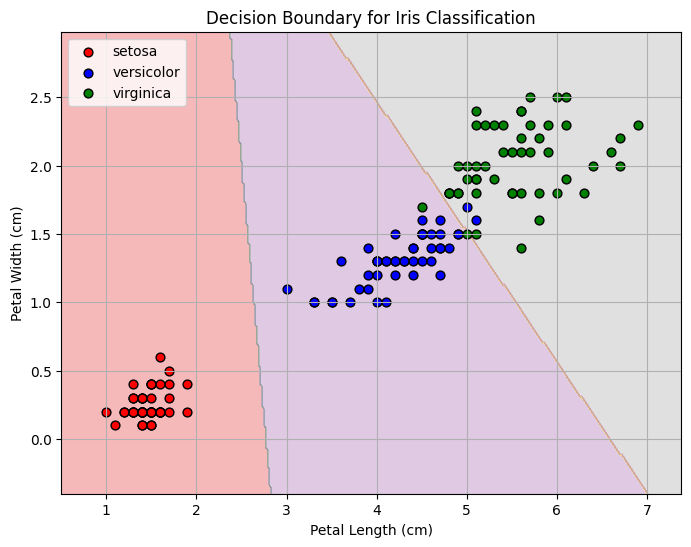

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load data
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and petal width (for 2D plotting)
y = iris.target
target_names = iris.target_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Create meshgrid for plotting
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

# Plot training points
for i, color in zip(range(3), ['red', 'blue', 'green']):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i], edgecolor='k', s=40)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Boundary for Iris Classification')
plt.legend()
plt.grid(True)
plt.show()


#7. Key Takeaways
* Data preprocessing is crucial for model performance.
* Start with simple algorithms (Linear/Logistic Regression, kNN).
* Always evaluate models using appropriate metrics.

#8.interview questions

##1. Supervised vs. Unsupervised Learning
* Q: What’s the difference between supervised and unsupervised learning? Give examples.

##2. Overfitting vs. Underfitting
* Q: Explain overfitting and underfitting. How can you prevent them?

##3. Data Preprocessing
* Q: How would you handle missing values in a dataset?
* Q: Why is feature scaling important? Which algorithms require it?

##4. Linear Regression
* Q: How does Linear Regression work? What assumptions does it make?
* Q: How do you interpret the coefficients in Linear Regression?

##5. Logistic Regression
* Q: Why is Logistic Regression used for classification if it’s called "regression"?
* Q: What is the loss function used in Logistic Regression?

##6. Evaluation Metrics
* Q: When would you use Precision over Accuracy?
* Q: What’s the difference between MSE and R² in regression?

##7. k-Nearest Neighbors (kNN)
Q: How does kNN work? How do you choose ‘k’?

##8. Coding Question
Q: How would you split data into train/test sets and train a Linear Regression model in Python?